# Generating spikes from oscillatory instantaneous rate profiles

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## spike trains parameters

In [2]:
# time parameters
T = 1000 # in ms
dt = 0.001

# neuron number
N = 10

# baseline firing rate (spk per second)
r0 = 4.0

# correlation parameters
rc = 8.0 # rate of correlated event : pour chaque time on veut 8 spike simultanés ? 
p = 0.5 # probability of firing for neurons in pattern : prob de décharger en même temps sachant le taux de décharge ? 
nrn_pat = range(5) # neurons in pattern

# instantaneous firing rates
inst_rate = np.ones([N,T]) * r0 
for i in nrn_pat:
    # reduce baseline firing rate for pattern neurons (to match others) : pourquoi ? 
    inst_rate[i] -= rc * p
corr_event_rate = np.ones([T]) * rc 
print(inst_rate, corr_event_rate)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [4. 4. 4. ... 4. 4. 4.]
 [4. 4. 4. ... 4. 4. 4.]
 [4. 4. 4. ... 4. 4. 4.]] [8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8.
 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8.
 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8.
 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8.
 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8.
 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8.
 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8.
 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8.
 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8.
 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8.
 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8.
 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8

## generate spike train

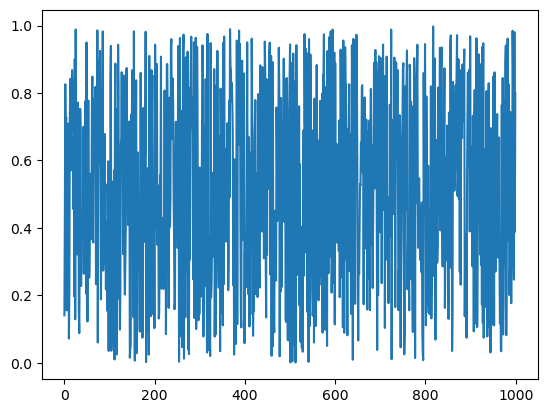

In [3]:
p_rand  = np.random.rand(T)
plt.plot(p_rand)

In [49]:
spk_ts = []
for i in range(N):
    # non correlated spikes
    spk_ts += [list(np.argwhere(np.random.rand(T)<inst_rate[i,:]*dt).flatten())] # pourquoi : inst_rate[i,:]*dt ? 
                                                                                 # sachant taux de décharge instant la proba de spike doit etre plus grande que celle
                                                                                 # obtenue aléatoirement

# correlated events
ev = np.argwhere(np.random.rand(T)<corr_event_rate*dt).flatten()

for t in ev.flatten(): # pourquoi .flatten
    # add a spike to each neuron involved in the pattern with probability p
    for i in nrn_pat:
        if np.random.rand()<p:
            spk_ts[i].append(t)
# resort spike times and format as array
for i in range(N):
    spk_ts[i] = np.array(np.sort(spk_ts[i]))



### spike raster

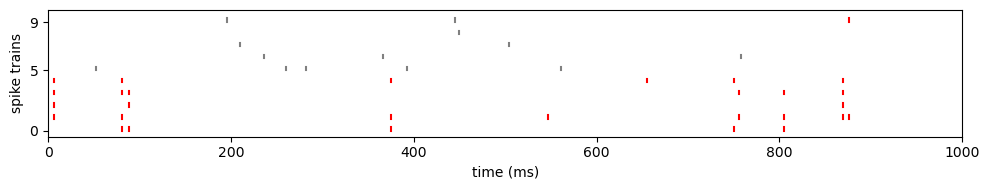

In [50]:
frmt_grph = 'png'
cols = ['r','gray']

plt.figure(figsize=[10,2])
for i in range(N):
    for t in spk_ts[i]:
        if t in ev:
            plt.plot((t,t), (i,i+0.3), c=cols[0], lw=1.5)
        else:
            plt.plot((t,t), (i,i+0.3), c=cols[1], lw=1.5)
plt.yticks([0,5,9])
plt.axis(xmin=0, xmax=T, ymin=-0.5, ymax=N)
plt.xlabel('time (ms)')
plt.ylabel('spike trains')
plt.tight_layout()

## lagged covariance

In [10]:
# lagged covariancefor each stimulus (first half, second half)
L = 50 # max lag (ms)
cov = np.zeros([2*L,2,2]) # first index = time lag; last indices are group pairs (correlated half and uncorrelated half)
for i in range(N):
    for j in range(N):
        if not i==j: # exclude autocovariance
            for t_i in spk_ts[i]:
                for t_j in spk_ts[j]:
                    l = t_i - t_j
                    if l>=-L and l<L:
                        i_l = l+L
                        cov[i_l,int(i/5),int(i/5)] += 1

### lagged covariances plot

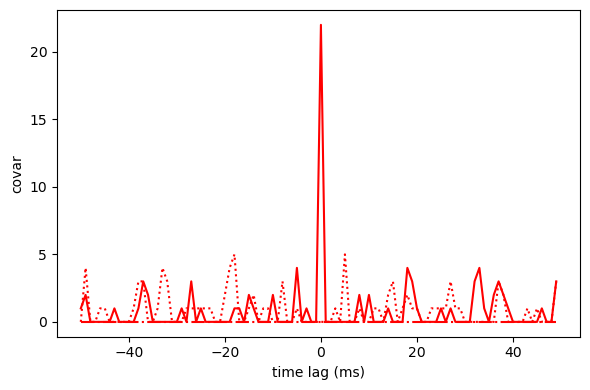

In [11]:
plt.figure(figsize=[6,4])
plt.plot(np.arange(-L,L), cov[:,0,0], c='r', ls='-', label='corr-corr')
plt.plot(np.arange(-L,L), cov[:,0,1], c='r', ls='-.', label='corr-uncorr')
plt.plot(np.arange(-L,L), cov[:,1,1], c='r', ls=':', label='uncorr-uncorr')
plt.xlabel('time lag (ms)')
plt.ylabel('covar')
plt.tight_layout()


# Generating spike train from poisson process